# Machine Learning on Road Accident Severity Prediction

## Introduction/Business Problem

The government of Seattle  has segmented its road accident data by its severity, categorizing the severity mainly into 2 groups, 1) collisions which only involved property damage and 2) collisions which involved injury. 

The severity data comes along with a dozen of attributes data, such as address, influence of alcohol or drugs, type of accidents, no. of vehicles or person involved, weather condition, light condition, road condition, location and so on. If these conditions can be used to predict road accident fatality, the government can customize warnings on the digital road signage for drivers on the road given different conditions which might trigger an accident. 

It is a classification problem. That is, given the dataset, with predefined labels, we need to build a model to be used to predict class of a new or unknown case.

## Description of Attributing Data

This project focuses on using different scenario where accidents happened, such as road condition, weather condition, and light condition, to predict different accident severities. 

The WEATHER (description of the weather conditions during the time of the collision) column has different categories such as clear, raining and overcast. The ROADCOND (description of the road conditions during the time of the collision) column has different categories such as dry, wet and ice. The LIGHTCOND (description of the light conditions during the time of the collision) column has different categories such as daylight, dark with street lights on and dusk. There are around 10% of missing/unknown data in the WEATHER column, ROADCOND column, and LIGHTCOND column respectively. It is almost impossible to identify the condition judging from other attributes on the specific row, so the entire rows with missing data will be deleted to ensure high accuracy of model.

INATTENTIONIND column indicates whether or not collision was due to inattention. SPEEDING column indicates whether or not speeding was a factor in the collision. PEDROWNOTGRNT column indicates whether or not the pedestrian right of way was not granted. These might be the potential of identifying the occurence of accident severity. Unfortunately due to the large amount of missing data (more than 50%), I have deleted these columns.

The target field, called SEVERITY, has four possible values that correspond to the four severity groups, as follows: 3—fatality, 2b—serious injury, 2—injury and 1—prop damage. However, since the data collected only correspond to the last 2 groups, the prediction from machine learning will only covers 2—injury and 1—prop damage.

Our objective is to build a classifier, to predict the class of severity given a situation. We will use a different types of classification called K nearest neighbour, SVM, decision trees and logistic regression to find out which of the algorithm best fit.

All collisions are provided by SPD (Seattle Police Department) and recorded by Traffic Records.

## Exploration of Data

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

/Users/yang/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head(10)

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N
5,1,-122.387598,47.690575,6,320840,322340,E919477,Matched,Intersection,36974.0,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
6,1,-122.338485,47.618534,7,83300,83300,3282542,Matched,Intersection,29510.0,...,Wet,Daylight,NaN,8344002.0,NaN,10,Entering at angle,0,0,N
7,2,-122.320780,47.614076,9,330897,332397,EA30304,Matched,Intersection,29745.0,...,Dry,Daylight,NaN,NaN,NaN,5,Vehicle Strikes Pedalcyclist,6855,0,N
8,1,-122.335930,47.611904,10,63400,63400,2071243,Matched,Block,NaN,...,Dry,Daylight,NaN,6166014.0,NaN,32,One parked--one moving,0,0,N
9,2,-122.384700,47.528475,12,58600,58600,2072105,Matched,Intersection,34679.0,...,Dry,Daylight,NaN,6079001.0,NaN,10,Entering at angle,0,0,N


In [4]:
df.shape

(194673, 38)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    194673 non-null  int64  
 1   X               189339 non-null  float64
 2   Y               189339 non-null  float64
 3   OBJECTID        194673 non-null  int64  
 4   INCKEY          194673 non-null  int64  
 5   COLDETKEY       194673 non-null  int64  
 6   REPORTNO        194673 non-null  object 
 7   STATUS          194673 non-null  object 
 8   ADDRTYPE        192747 non-null  object 
 9   INTKEY          65070 non-null   float64
 10  LOCATION        191996 non-null  object 
 11  EXCEPTRSNCODE   84811 non-null   object 
 12  EXCEPTRSNDESC   5638 non-null    object 
 13  SEVERITYCODE.1  194673 non-null  int64  
 14  SEVERITYDESC    194673 non-null  object 
 15  COLLISIONTYPE   189769 non-null  object 
 16  PERSONCOUNT     194673 non-null  int64  
 17  PEDCOUNT  

In [6]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [7]:
 # Delete any column which contains large amount of missing data.
df.drop(['EXCEPTRSNCODE', 'EXCEPTRSNDESC','SEVERITYCODE.1'], axis = 1, inplace = True) 

In [8]:
df.shape

(194673, 35)

In [9]:
# Delete any row which contains missing data in attributes 'WEATHER', 'ROADCOND','LIGHTCOND'.
df2 = df.dropna(how='all', subset=['WEATHER', 'ROADCOND','LIGHTCOND'])
df2.shape

(189726, 35)

In [10]:
# Delete any row which contains "Unknown" data in attributes 'WEATHER', 'ROADCOND','LIGHTCOND'.

df2 = df2[df2['WEATHER'] != 'Unknown']
df2 = df2[df2['ROADCOND'] != 'Unknown']
df3 = df2[df2['LIGHTCOND'] != 'Unknown']
df3.shape

(170824, 35)

In [11]:
# Delete any row which contains "Other" data in attributes 'WEATHER', 'ROADCOND','LIGHTCOND'.

df3 = df3[df3['WEATHER'] != 'Other']
df3 = df3[df3['ROADCOND'] != 'Other']
df4 = df3[df3['LIGHTCOND'] != 'Other']
df4.shape

(170269, 35)

In [12]:
df4.groupby(['WEATHER'])['SEVERITYCODE'].value_counts(normalize=False)

WEATHER                   SEVERITYCODE
Blowing Sand/Dirt         1                  33
                          2                  14
Clear                     1               73337
                          2               35614
Fog/Smog/Smoke            1                 370
                          2                 183
Overcast                  1               18324
                          2                8630
Partly Cloudy             2                   3
                          1                   2
Raining                   1               21590
                          2               11086
Severe Crosswind          1                  18
                          2                   7
Sleet/Hail/Freezing Rain  1                  79
                          2                  28
Snowing                   1                 665
                          2                 166
Name: SEVERITYCODE, dtype: int64

In [13]:
df4.groupby(['ROADCOND'])['SEVERITYCODE'].value_counts(normalize=False)

ROADCOND        SEVERITYCODE
Dry             1               81974
                2               39718
Ice             1                 820
                2                 263
Oil             1                  36
                2                  24
Sand/Mud/Dirt   1                  44
                2                  22
Snow/Slush      1                 681
                2                 156
Standing Water  1                  77
                2                  28
Wet             1               30833
                2               15545
Name: SEVERITYCODE, dtype: int64

In [14]:
df4.groupby(['LIGHTCOND'])['SEVERITYCODE'].value_counts(normalize=False)

LIGHTCOND                 SEVERITYCODE
Dark - No Street Lights   1                1087
                          2                 322
Dark - Street Lights Off  1                 811
                          2                 309
Dark - Street Lights On   1               32526
                          2               14287
Dark - Unknown Lighting   1                   5
                          2                   3
Dawn                      1                1607
                          2                 806
Daylight                  1               74577
                          2               38096
Dusk                      1                3755
                          2                1906
Name: SEVERITYCODE, dtype: int64

## One Hot Encoding

In [15]:
df4[['WEATHER','ROADCOND','LIGHTCOND']].head(10)

,WEATHER,ROADCOND,LIGHTCOND
0,Overcast,Wet,Daylight
1,Raining,Wet,Dark - Street Lights On
2,Overcast,Dry,Daylight
3,Clear,Dry,Daylight
4,Raining,Wet,Daylight
5,Clear,Dry,Daylight
6,Raining,Wet,Daylight
7,Clear,Dry,Daylight
8,Clear,Dry,Daylight
9,Clear,Dry,Daylight


In [16]:
Feature = df4[['WEATHER','ROADCOND','LIGHTCOND']]
Feature = pd.concat([Feature,pd.get_dummies(df4['WEATHER'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df4['ROADCOND'])], axis=1)
Feature = pd.concat([Feature,pd.get_dummies(df4['LIGHTCOND'])], axis=1)
Feature.drop(['WEATHER'], axis = 1,inplace=True)
Feature.drop(['ROADCOND'], axis = 1,inplace=True)
Feature.drop(['LIGHTCOND'], axis = 1,inplace=True)
Feature.head(10)

,Blowing Sand/Dirt,Clear,Fog/Smog/Smoke,Overcast,Partly Cloudy,Raining,Severe Crosswind,Sleet/Hail/Freezing Rain,Snowing,Dry,...,Snow/Slush,Standing Water,Wet,Dark - No Street Lights,Dark - Street Lights Off,Dark - Street Lights On,Dark - Unknown Lighting,Dawn,Daylight,Dusk
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
7,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
8,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
9,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


In [17]:
# Merge similar columns into one category.
Feature['Sunny'] = Feature['Clear'] 
Feature['Cloudy'] = Feature['Overcast'] + Feature['Partly Cloudy']
Feature['Reduced visibility'] = Feature['Blowing Sand/Dirt'] + Feature['Fog/Smog/Smoke'] + Feature['Raining'] + Feature['Severe Crosswind']
Feature['Winter'] = Feature['Sleet/Hail/Freezing Rain'] + Feature['Snowing']

Feature['Water'] = Feature['Wet'] + Feature['Standing Water'] 
Feature['Slippery'] = Feature['Ice'] + Feature['Oil'] + Feature['Sand/Mud/Dirt'] + Feature['Snow/Slush'] 

Feature['Limited light'] = Feature['Dark - Street Lights On'] + Feature['Dark - Unknown Lighting'] + Feature['Dawn'] + Feature['Dusk']
Feature['Dark'] = Feature['Dark - No Street Lights'] + Feature['Dark - Street Lights Off']

Feature.drop(['Blowing Sand/Dirt', 'Clear','Fog/Smog/Smoke','Overcast','Partly Cloudy','Raining','Severe Crosswind','Sleet/Hail/Freezing Rain',
             'Snowing','Ice','Oil','Sand/Mud/Dirt','Snow/Slush','Standing Water','Wet','Dark - No Street Lights','Dark - Street Lights Off',
             'Dark - Street Lights On','Dark - Unknown Lighting','Dawn','Dusk'], axis = 1, inplace = True) 

Feature.head(10)

,Dry,Daylight,Sunny,Cloudy,Reduced visibility,Winter,Water,Slippery,Limited light,Dark
0,0,1,0,1,0,0,1,0,0,0
1,0,0,0,0,1,0,1,0,1,0
2,1,1,0,1,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,0
4,0,1,0,0,1,0,1,0,0,0
5,1,1,1,0,0,0,0,0,0,0
6,0,1,0,0,1,0,1,0,0,0
7,1,1,1,0,0,0,0,0,0,0
8,1,1,1,0,0,0,0,0,0,0
9,1,1,1,0,0,0,0,0,0,0


In [18]:
X = Feature
X[0:5]

,Dry,Daylight,Sunny,Cloudy,Reduced visibility,Winter,Water,Slippery,Limited light,Dark
0,0,1,0,1,0,0,1,0,0,0
1,0,0,0,0,1,0,1,0,1,0
2,1,1,0,1,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,0
4,0,1,0,0,1,0,1,0,0,0


In [19]:
y = df4['SEVERITYCODE'].values
y[0:10]

array([2, 1, 1, 1, 2, 1, 1, 2, 1, 2])

In [20]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[-1.5827622 ,  0.71496739, -1.33297382,  2.30561272, -0.49308192,
        -0.07442746,  1.63188177, -0.1102834 , -0.68978289, -0.12278805],
       [-1.5827622 , -1.39866519, -1.33297382, -0.43372419,  2.02806056,
        -0.07442746,  1.63188177, -0.1102834 ,  1.44973152, -0.12278805],
       [ 0.63180685,  0.71496739, -1.33297382,  2.30561272, -0.49308192,
        -0.07442746, -0.61278949, -0.1102834 , -0.68978289, -0.12278805],
       [ 0.63180685,  0.71496739,  0.75020228, -0.43372419, -0.49308192,
        -0.07442746, -0.61278949, -0.1102834 , -0.68978289, -0.12278805],
       [-1.5827622 ,  0.71496739, -1.33297382, -0.43372419,  2.02806056,
        -0.07442746,  1.63188177, -0.1102834 , -0.68978289, -0.12278805]])

## Machine Learning Algorithm

In [21]:
# We split the X into train and test to find the best k
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (136215, 10) (136215,)
Test set: (34054, 10) (34054,)


In [22]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

### K Nearest Neighbor

In [23]:
# Modeling
from sklearn.neighbors import KNeighborsClassifier
k = 8 # Replace with the best k
#Train Model and Predict  
kNN_model = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
kNN_model

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                     weights='uniform')

In [24]:
# just for sanity check
KN_yhat = kNN_model.predict(X_test)

unique_elements, counts_elements = np.unique(KN_yhat, return_counts=True)
print("Frequency of unique values of the array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the array:
[[    1     2]
 [34033    21]]


In [25]:
# Best k
#Ks=10
#mean_acc=np.zeros((Ks-1))
#std_acc=np.zeros((Ks-1))
#ConfustionMx=[];
#for n in range(1,Ks):
    
    #Train Model and Predict  
#    kNN_model = KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
#    yhat = kNN_model.predict(X_test)
    
    
#    mean_acc[n-1]=np.mean(yhat==y_test);
    
#    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
#mean_acc

In [26]:
print("KNN Jaccard index: %.3f" % jaccard_similarity_score(y_test, KN_yhat))
print("KNN F1-score: %.3f" % f1_score(y_test, KN_yhat, average='weighted') )

KNN Jaccard index: 0.672
KNN F1-score: 0.540


/Users/yang/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


### Decision Tree

In [27]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 4) # Best max depth=4
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
DT_yhat = DT_model.predict(X_test)

unique_elements, counts_elements = np.unique(DT_yhat, return_counts=True)
print("Frequency of unique values of the array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the array:
[[    1     2]
 [34052     2]]


In [29]:
 # Find best depth
#Dp = 10
#mean_acc=np.zeros((Dp-1))
#std_acc=np.zeros((Dp-1))
#ConfustionMx=[];
#for n in range(1,Dp):
    
    #Train Model and Predict  
#    DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = Dp)
#    DT_model.fit(X_train,y_train)
#    yhat = DT_model.predict(X_test)
    
    
#    mean_acc[n-1]=np.mean(yhat==y_test);
    
#    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])
#mean_acc

In [30]:
print("DT Jaccard index: %.3f" % jaccard_similarity_score(y_test, DT_yhat))
print("DT F1-score: %.3f" % f1_score(y_test, DT_yhat, average='weighted') )

DT Jaccard index: 0.672
DT F1-score: 0.540


/Users/yang/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


### Support Vector Machine

In [31]:
from sklearn import svm
SVM_model = svm.SVC()
SVM_model.fit(X_train, y_train) 

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [32]:
SV_yhat = SVM_model.predict(X_test)

unique_elements, counts_elements = np.unique(SV_yhat, return_counts=True)
print("Frequency of unique values of the array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the array:
[[    1]
 [34054]]


In [33]:
print("SVM Jaccard index: %.3f" % jaccard_similarity_score(y_test, SV_yhat))
print("SVM F1-score: %.3f" % f1_score(y_test, SV_yhat, average='weighted') )

SVM Jaccard index: 0.672
SVM F1-score: 0.540


/Users/yang/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


### Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
LR_model

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
LR_yhat = LR_model.predict(X_test)
LR_yhat_prob = LR_model.predict_proba(X_test)
unique_elements, counts_elements = np.unique(LR_yhat, return_counts=True)
print("Frequency of unique values of the array:")
print(np.asarray((unique_elements, counts_elements)))

Frequency of unique values of the array:
[[    1]
 [34054]]


In [36]:
print("LR Jaccard index: %.2f" % jaccard_similarity_score(y_test, LR_yhat))
print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted') )
print("LR LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob))

LR Jaccard index: 0.67
LR F1-score: 0.54
LR LogLoss: 0.63


/Users/yang/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [37]:
conda install basemap

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


/Users/yang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
/Users/yang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


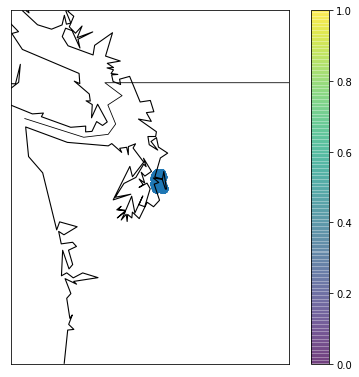

In [48]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap

# make up some data for scatter plot
x = df[['X']].values
y = df[['Y']].values
fig = plt.gcf()
fig.set_size_inches(8, 6.5)

m = Basemap(projection='mill',
            llcrnrlat = 45,#llcrncrlat=lower left corner latitude
            llcrnrlon = -125,
            urcrnrlat = 50,
            urcrnrlon = -120,
            resolution = 'l')

#m.bluemarble(scale=0.2)   # full scale will be overkill
m.drawcoastlines(linewidth=1.1)# add coastlines
m.drawcountries(linewidth=0.8)

# transform coordinates
#plt.subplot(221)
x,y=m(x,y)
plt.scatter(x, y,s=df.iloc[1:,2], alpha = 0.5, cmap='viridis')
plt.colorbar()


plt.show()


47° 27' 0'' N, 122° 13' 12'' W
47° 45' 0'' N, 122° 25' 48'' W 